In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import mean_squared_error

### Bitcoin

In [2]:
data = pd.read_csv('data/BTC.csv')

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3.048000e+03
mean,12895.490498,13219.802130,12534.169159,12900.698520,12900.698520,1.637023e+10
std,16144.364215,16557.227918,15667.046234,16139.933117,16139.933117,1.992438e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,682.358993,695.159989,669.351745,685.084763,685.084763,1.034188e+08
50%,7172.590088,7328.993897,6972.497070,7182.919678,7182.919678,7.636265e+09
75%,16919.418457,17201.264649,16655.772461,16940.592773,16940.592773,2.792719e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


[Text(0, 0, '2014-09-17'),
 Text(200, 0, '2015-04-05'),
 Text(400, 0, '2015-10-22'),
 Text(600, 0, '2016-05-09'),
 Text(800, 0, '2016-11-25'),
 Text(1000, 0, '2017-06-13'),
 Text(1200, 0, '2017-12-30'),
 Text(1400, 0, '2018-07-18'),
 Text(1600, 0, '2019-02-03'),
 Text(1800, 0, '2019-08-22'),
 Text(2000, 0, '2020-03-09'),
 Text(2200, 0, '2020-09-25'),
 Text(2400, 0, '2021-04-13'),
 Text(2600, 0, '2021-10-30'),
 Text(2800, 0, '2022-05-18'),
 Text(3000, 0, '2022-12-04')]

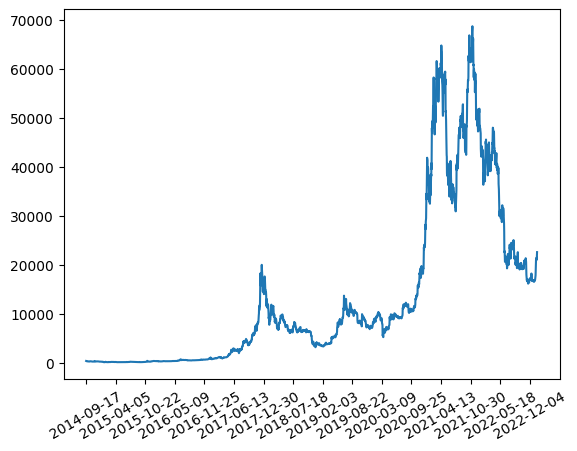

In [4]:
g = sns.lineplot(x = np.linspace(1,3049,3049), y = data['High'].values.reshape(-1))
g.set(xticks=np.arange(0,3049,200))
g.set_xticklabels(rotation=30, labels = data['Date'][0::200])

In [8]:
data_high = data["High"].to_numpy()
data_high = data_high[np.logical_not(np.isnan(data_high))]
data_high.shape

(3048,)

In [9]:
scaler = MinMaxScaler(feature_range = (0, 1))

data_normalized = scaler.fit_transform(data_high.reshape((-1, 1)))
data_normalized = np.reshape(data_normalized, (3048,))

In [10]:
def create_dataset(dataset, time_steps=1):
    data_x, data_y = [],[]
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        data_x.append(a)
        data_y.append(dataset[i + time_steps])
    return np.array(data_x), np.array(data_y)